# Objective: 

borrowers who default cause the largest amount of loss to the lenders. 
In this case, the customers labelled as 'charged-off' are the 'defaulters'

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. 
Identification of such applicants using EDA is the aim of this case study.

# Results Expected
- Write all your code in one well-commented Python file; briefly mention the insights and observations from the analysis 
- Present the overall approach of the analysis in a presentation: 
- Mention the problem statement and the analysis approach briefly 
- Explain the results of univariate, bivariate analysis etc. in business terms
- Include visualisations and summarise the most important results in the presentation
 

You need to submit one Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. 

 

`Important Note: Please make sure to rename your Python notebook "Group_Facilitator_Name.ipynb". `

 

 You need to submit a GitHub repository link that contains the files above . You need to write a README.md for the GitHub repository.  You can follow the video below to understand how to create the GitHub repository. Make sure your GitHub link is public. 

## <font color=blue> Lets understand more on the objective </font>
- We need to figure out for any new customers what are the parameters that will decide the customer will likely to be a defaulter
- So for this we need to analyze the columns that take part while applying the loan by the customer, i.e the columns we already new beforehand
- On the other hand the fields that provides information about the existing loans and behavior may not be quite helpful
- We shall analyze each columns for our decision making
- Insights shall be deduced along with supported graphs
- Overall Obseravions shall be shared with derived suggestions for analyzing the objective
- Suggestions shall be mentioned, what parameters shall decide a defaulter
- Insights shall be provide on which new customer is likely to fully pay the loan

### <font color=blue> High level actions to be taken for the analysis </font>

- Loading the data set
- Cleaning the data by following the suggested standard procedures and techniques
- Univariate Analysis
- Bivariate and multivariate Analysis

###  Importing all the required Libraries for EDA 

In [421]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [422]:
## Formatting the view of jupyter notebook

# Setting the maximum rows to 20
pd.set_option('display.max_rows', 200)

# Setting the maximum columns as per the data dictionary, able to view all the avaialable columns for analysis
pd.set_option('display.max_columns', 120)

pd.set_option('display.width', 1000)

# 1. Data Sourcing

### Loading the loan csv file

In [423]:
## Loading the loan.csv dataset
## Reading the csv data set and store it into a dataframe

loan_df = pd.read_csv('./loan/loan.csv') # The path of the dataset is 
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Viewing the basic statistics of the dataset

In [424]:
# Check the number of rows and columns 
print(loan_df.shape)

## Result : the data set consists of 39717 rows and 111 columns

(39717, 111)


## <font color=blue> Insight </font>
- Data set has - 39717 rows
- and 111 columns

### To view the full list of column

In [425]:
### using the option verbose=True in info() method
print(loan_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [426]:
## Observing the statisics using describe
loan_df.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## <font color=blue> Insight </font>
- the data set consists of 39717 rows and 111 columns
- The data types consists a combination of both Object and numeric

# 2. Data Cleaning

### In this section will be cleaning the data set by applying the following approaches
- 2.1 Fixing Missing Values
- 2.2 Fix Rows and columns
- 2.3 Standardise Values
- 2.4 Fix invalid values
- 2.5 Filter data

## 2.1 : Fixing Missing Values

In [427]:
## Getting the count of null values in each column
loan_df.isnull().sum().sort_values(ascending=False)


verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


## <font color=blue> Insight </font>
- There are columns which consists of all null values. 
- We can drop these columns
- As these columnms will not contribute anything in our analysis

## Fixing Missing Values : Dropping the list of fields having all values as null

In [428]:

print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df=loan_df.dropna(axis=1, how='all')
print(f'shape of dataframe after dropping columns {loan_df.shape}')


shape of dataframe before dropping columns (39717, 111)
shape of dataframe after dropping columns (39717, 57)


## <font color=blue> Insight </font>
- Nearly <font color=brown><b> 54 </b></font> columns have been dropped as all these column values are null
- As these columns have null values these can easily be dropped 
- And these fields will have no impact in the analysis

## Lets analyze all the fields having higher percentage of null values

## 2.2 Fix Rows and columns

### Fixing Rows

### 2.2.a Delete incorrect Rows : Unnecessary header and Footer rows

In [429]:
## Fetching the head and tail of the records to view any unnecessary data is present

loan_df.head()
loan_df.tail()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to consolidate over $7,000 of debt: a c...",debt_consolidation,Consolidation Loan,027xx,MA,14.29,1,Oct-03,0,11.0,0.0,7,0,4175,51.50%,8,f,0.0,0.0,9195.263334,980.83,7500.0,1695.26,0.0,0.0,0.0,Jun-10,256.59,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## <font color=blue> Insight </font>
- Header & Footer rows are fine. Nothing to remove

### 2.2.b Delete summary rows if any

In [430]:

## Observations: No such summary rows to be deleted. Few of the rows marked as total* will be used for analysis

### 2.2.c Delete Extra rows: Detecting column number indicator, blank rows etc

In [431]:

## Dropping rows which have all null values
print(f'shape of dataframe before dropping rows {loan_df.shape}')
loan_df.dropna(axis='index', how='all', inplace=True)
print(f'shape of dataframe after dropping rows {loan_df.shape}')


shape of dataframe before dropping rows (39717, 57)
shape of dataframe after dropping rows (39717, 57)


## <font color=blue> Insight </font>
- <font color=brown><b> 0 </b></font> rows has been deleted
- There are no rows having all null values
- No rows deleted

## Fixing Columns

### 2.2.d : Add column name if missing

## <font color=blue> Insight </font>
- All Columns have proper column header
- There is no extra column as column indicator

### 2.2.e : Rename Columns for Abbrevations and encoded columns

## <font color=blue> Insight </font>
- As of now the header names looks good and do not contain any abbreviated oe encoded columns


### 2.2.f : Delete unnecessary columns 

### Dropping list of customer behavior columns
`These customer behavior columns will not help in analysis of defaulter for any new customers`<br>
<br>
<br>
Listing some of the columns
- next_pymnt_d
- mths_since_last_record
- mths_since_last_delinq
- desc
- delinq_2yrs
- earliest_cr_line
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type

In [432]:
## Dropping the above list of columns

column_list = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(column_list, axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')

shape of dataframe before dropping columns (39717, 57)
shape of dataframe after dropping columns (39717, 33)


## <font color=blue> Insight </font>
- <font color=brown><b>25 </b> </font> columns has been deleted
- As these columns falls under the category of customer behaviour field, these field will not contribute towards our analysis
- These columns have been droped

## Analyzing different columns and observing the values in it

### Generic function to plot a count plot for field value analysis

In [433]:
def draw_count_plot(column_name):
    
    ## Display the list of values for the column
    print(loan_df[column_name].value_counts())
    
    plt.figure(figsize = (9,3))
    sns.countplot(data=loan_df,x=loan_df[column_name])
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Count plot for {column_name}")
    plt.show()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
        ... 
381xx      1
378xx      1
739xx      1
396xx      1
469xx      1
Name: zip_code, Length: 823, dtype: int64


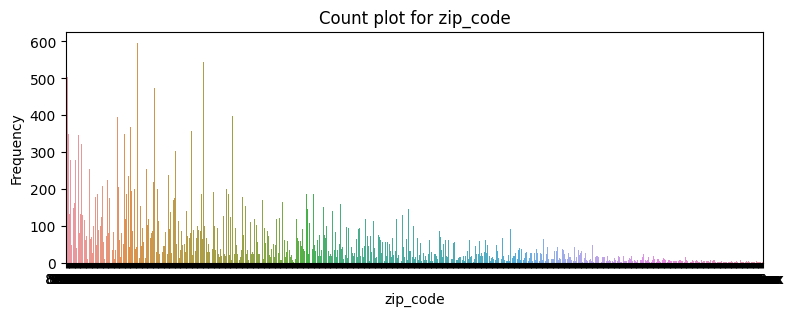

In [434]:
## Analyzying zip_code values
loan_df['zip_code'].value_counts(normalize=True)
draw_count_plot('zip_code')

## <font color=blue> Insight </font>
- Dropping column <font color=brown> <b>zip_code</b> </font>
- Zip code do not provide much information about the defaulters 
- To analyze the dafaulters as per different physical zones we can make use of field Address. Address field will provide more effective info as compared to zipcode
- We can drop this column

1    39717
Name: policy_code, dtype: int64


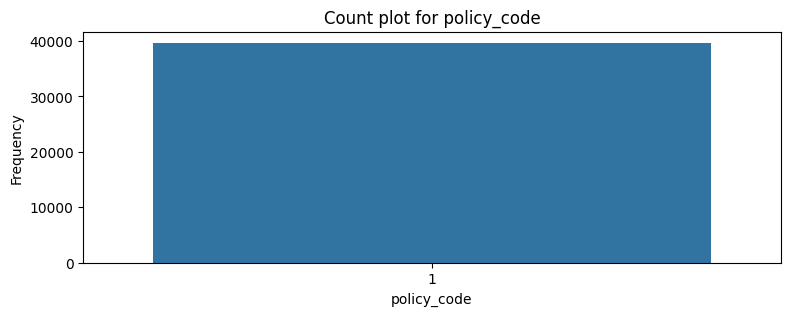

In [435]:
## Analyzying policy_code values

draw_count_plot('policy_code')


## <font color=blue> Insight </font>
- policy_code field contains only a single value 1
- Having a single value for all the rows will not impact the statistics
- We can drop this column

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64


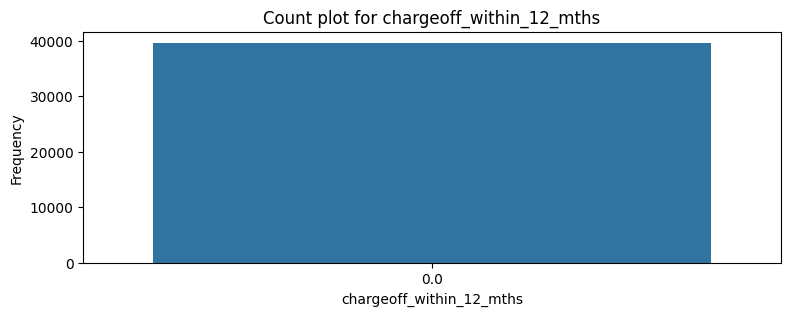

In [436]:
## Analyzying 'chargeoff_within_12_mths' values

draw_count_plot('chargeoff_within_12_mths')


## <font color=blue> Insight </font>
- chargeoff_within_12_mths field contains only a single value 0.0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

0    39717
Name: delinq_amnt, dtype: int64


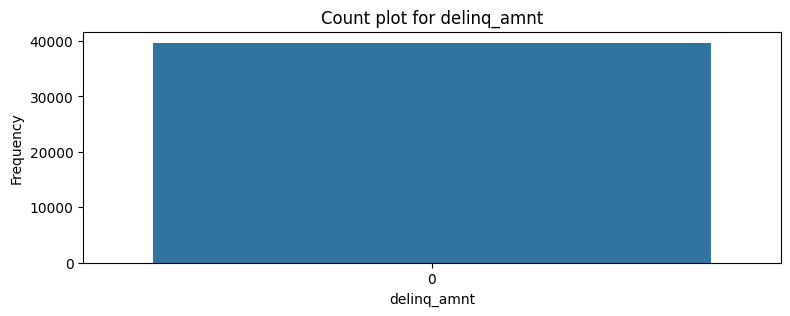

In [437]:
## Analyzying 'delinq_amnt' values
draw_count_plot('delinq_amnt')

## Observation:
## Only value 0 is present in this column, we can drop it

## <font color=blue> Insight </font>
- delinq_amnt field contains only a single value 0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

0.0    39678
Name: tax_liens, dtype: int64


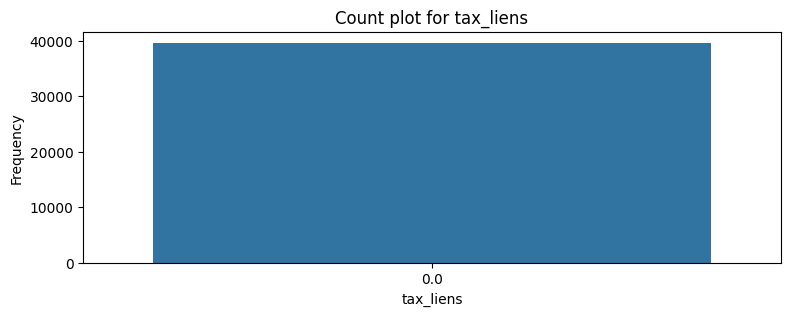

In [438]:
## Analyzying 'tax_liens' values
draw_count_plot('tax_liens')

## Observations:
## This field also contains a single value 0, we can drop it  

## <font color=blue> Insight </font>
- tax_liens field contains only a single value 0.0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


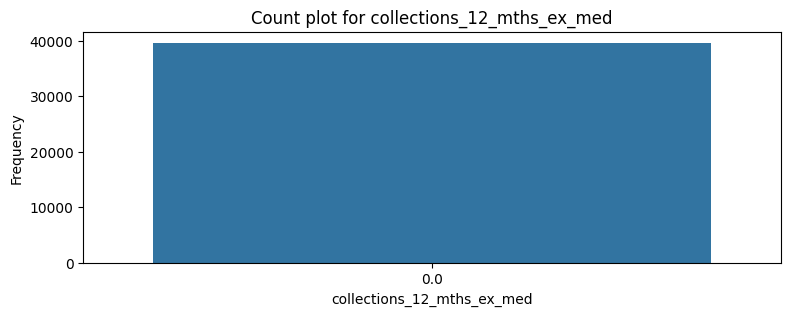

In [439]:
## Analyzying 'collections_12_mths_ex_med' values

draw_count_plot('collections_12_mths_ex_med')

## Observations:
## This field also contains a single value 0, we can drop it 

## <font color=blue> Insight </font>
- collections_12_mths_ex_med field contains only a single value 0.0
- Having a single value for all the rows will not impact the statistics
- We can drop this column

f    39717
Name: initial_list_status, dtype: int64


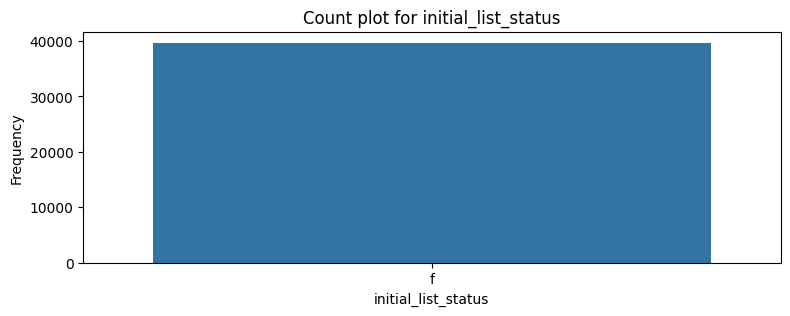

In [440]:
## Analyzying initial_list_status

loan_df['initial_list_status'].value_counts()
draw_count_plot('initial_list_status')

## Observations:
## This field also contains a single value 'f'. This will have no impact on the analysis

## <font color=blue> Insight </font>
- initial_list_status field contains only a single value f
- Having a single value for all the rows will not impact the statistics
- We can drop this column

In [441]:
## Analyzying pub_rec

# loan_df['pub_rec'].value_counts()

## Observations: This cannot be droped as it contains different segment of data

## <font color=blue> Insight </font>


In [442]:
## Analyzying url

loan_df['url'].value_counts()


https://lendingclub.com/browse/loanDetail.action?loan_id=1077501    1
https://lendingclub.com/browse/loanDetail.action?loan_id=568534     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=567165     1
https://lendingclub.com/browse/loanDetail.action?loan_id=568531     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=785667     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785659     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785630     1
https://lendingclub.com/browse/loanDetail.action?loan_id=785626     1
https://lendingclub.com/browse/loanDetail.action?loan_id=87023      1
Name: url, Length: 39717, dtype: int64

## <font color=blue> Insight </font>
- The url common is necessary for the existing data set. For the prediction of new data, this field is not usefull
- We can drop this column

In [443]:
## Analyzying home_ownership

loan_df['home_ownership'].value_counts()


RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

## <font color=blue> Insight </font>
- This field could be an important factor to analyze
- This may tell which category of house ownership falls into more defaulters

In [444]:
## Analyzing column revol_util

# loan_df['revol_util'].value_counts()

## Observations:
## Currently will not assign any values to the null values as it might impact the analysis

## Final Observations on Delete unnecessary columns 
- zip_code
- policy_code
- chargeoff_within_12_mths
- delinq_amnt
- tax_liens
- collections_12_mths_ex_med 
- initial_list_status
- url
### These fields contains only a single value. As single value will not impact the analysis so will drop these columns

In [445]:
## Dropping the above list of columns

column_list = ['zip_code', 'policy_code', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens','collections_12_mths_ex_med','initial_list_status', 'url']

print(f'shape of dataframe before dropping columns {loan_df.shape}')
loan_df = loan_df.drop(column_list, axis=1)
print(f'shape of dataframe after dropping columns {loan_df.shape}')

shape of dataframe before dropping columns (39717, 33)
shape of dataframe after dropping columns (39717, 25)


In [446]:
## Checking updated null value count
loan_df.isnull().sum().sort_values(ascending=False)

emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
title                     11
verification_status        0
acc_now_delinq             0
dti                        0
addr_state                 0
purpose                    0
pymnt_plan                 0
loan_status                0
issue_d                    0
id                         0
annual_inc                 0
member_id                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
funded_amnt                0
loan_amnt                  0
home_ownership             0
dtype: int64

In [447]:
## TODO

In [448]:
# loan_df = loan_df[~(loan_df['last_pymnt_d'].isnull() | loan_df['revol_util'].isnull() | loan_df['last_credit_pull_d'].isnull())]
# loan_df.shape

In [449]:
## TODO

In [450]:
loan_df['title'].fillna('Not Available', inplace=True)
loan_df['title'].isnull().sum()

0

### 2.2.g : Split columns for more data like url, date etc

In [451]:
### url : Can retrive the loanid from url

In [452]:
### issue_d : Can create two columns of month and year

In [453]:
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['month'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df['month']

loan_df['year'] = pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: year, Length: 39717, dtype: int64

### 2.2.h : Merge column for identifiers

In [454]:
## Observations:
## No available columns to get merged

### 2.2.i : Allign Misalligned columns

In [455]:
## Observations:
## Data seems to be alligned properly. No shifting of data is required

## 2.3 Standardise Values

### Standardising column 'term'

In [456]:
## Analyzing column 'term'

print(loan_df['term'].value_counts())

## Observations::
## we can convert the field type to int and rename the column to terms in months

## Extract the digit value from the field
loan_df['term'] = loan_df['term'].str.strip('months')

## Convert the field type to int
loan_df['term'] = loan_df['term'].astype("int")


## rename column term to term in months
loan_df.rename(columns={'term':'term_in_months'}, inplace=True)

# checking the values in the renamed field 
print('post rename and modifying the column values --------')
print(loan_df['term_in_months'].value_counts())

# Checking the field type
print(loan_df['term_in_months'].dtype)

 36 months    29096
 60 months    10621
Name: term, dtype: int64
post rename and modifying the column values --------
36    29096
60    10621
Name: term_in_months, dtype: int64
int32


### Standardising column 'int_rate'

In [457]:
## Analyzing the column 'int_rate'

print(loan_df['int_rate'])

## Remove the % from the field value
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%')

## Convert the field type to int
loan_df['int_rate'] = loan_df['int_rate'].astype("float")

print('-------- post modifying the column values --------')
print(f"{loan_df['int_rate'].value_counts()}")
print(f"Modified data type - {loan_df['int_rate'].dtype}")

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object
-------- post modifying the column values --------
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
Modified data type - float64


## Standardising column revol_util

In [458]:
## Analyzing the column 'revol_util'

print(loan_df['revol_util'])

## Remove the % from the field value
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%')

## Convert the field type to int
loan_df['revol_util'] = loan_df['revol_util'].astype("float")

print('-------- post modifying the column values --------')
print(f"{loan_df['revol_util'].value_counts()}")
print(f"Modified data type - {loan_df['revol_util'].dtype}")

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object
-------- post modifying the column values --------
0.00     977
0.20      63
63.00     62
40.70     58
66.70     58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: revol_util, Length: 1089, dtype: int64
Modified data type - float64


In [459]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,revol_util,acc_now_delinq,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,83.7,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,9.4,0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,98.5,0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,21.0,0,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,53.9,0,0.0,12,2011


## 2.4 Fix invalid values

In [460]:
## Observations:
## Few of the column types have been changed to int after data modification

## 2.5 Filter data

### 2.5.a : Duplicated Data

In [461]:
## Check whether any duplictae entry is present. Will analyze the column id

print(f"Unique values in the column id - {loan_df['id'].nunique()}")

## Observation:
## The count of unique values are equal to the total rows. i.e., no duplicate entries are present


Unique values in the column id - 39717


### 2.5.b : Filter Rows

In [462]:
## Observations:
## The rows having null values are droped. In this data set no such rows present which pressent all null values

### 2.5.c : Filter Columns

In [463]:
## Observations:
## Columns containing all null values have been droped
## Unwanted columns which will not contribute in the analysis have been droped

## ---- DATA CLEANING DONE -----

In [464]:
print(loan_df.isnull().sum().sort_values(ascending=False))
print(f'Final shape of data set - {loan_df.shape}')

emp_title               2459
emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
id                         0
issue_d                    0
month                      0
acc_now_delinq             0
dti                        0
addr_state                 0
title                      0
purpose                    0
pymnt_plan                 0
loan_status                0
annual_inc                 0
verification_status        0
member_id                  0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term_in_months             0
funded_amnt_inv            0
funded_amnt                0
loan_amnt                  0
year                       0
dtype: int64
Final shape of data set - (39717, 27)


## <font color=blue> Insights </font>
- There are few columns which contains null values
- Will analyze more on these columns in Univariate analysis and take decisions
- After data cleaning we have <font color=brown> <b>39717</b> </font> rows and <font color=brown> <b>27</b> </font> columns

# <font color=blue> Univariate Analysis </font>

In [465]:
## For numerical column analysis
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(loan_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

In [466]:
## For non-numerical column analysis
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = loan_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

## Numerical Column Analysis

- Getting all the numerical columns
- Plotting the histogram for the numerical columns for more insights

In [467]:
## 1. Getting the numerical columns

loan_num_columns = loan_df.select_dtypes(include="number")
print(loan_num_columns.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_in_months', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'acc_now_delinq', 'pub_rec_bankruptcies', 'month', 'year'], dtype='object')


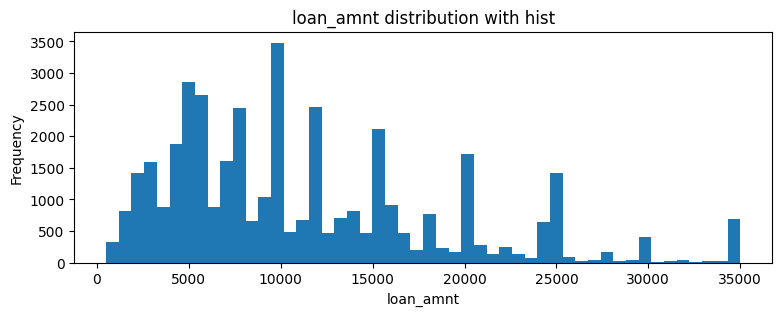

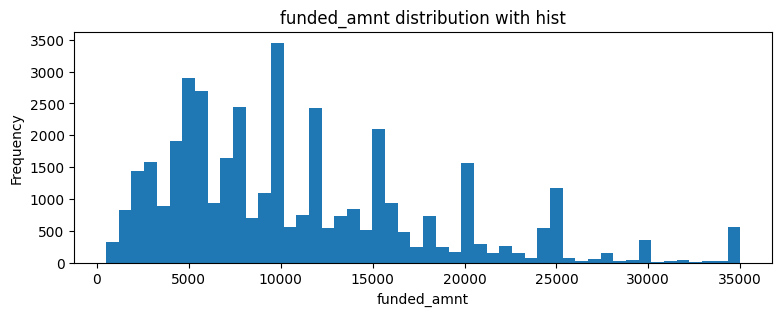

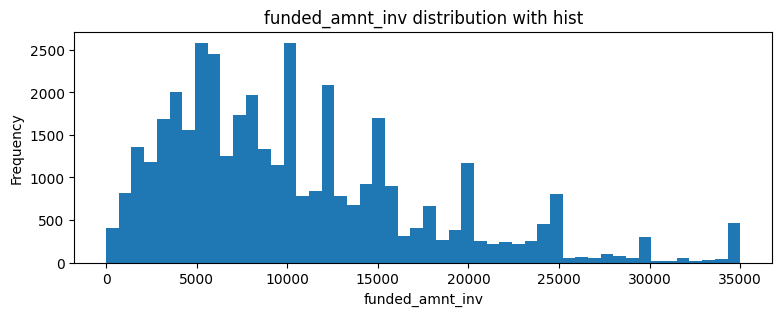

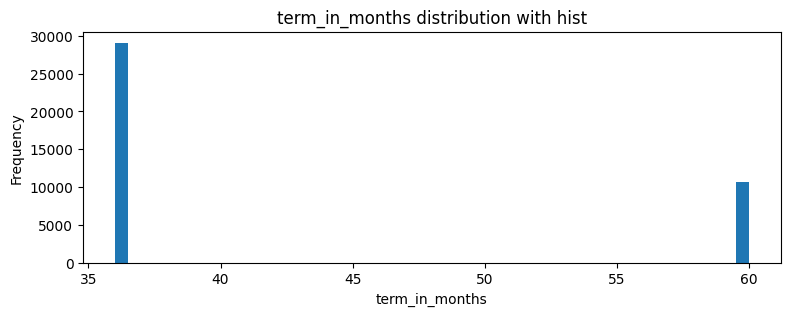

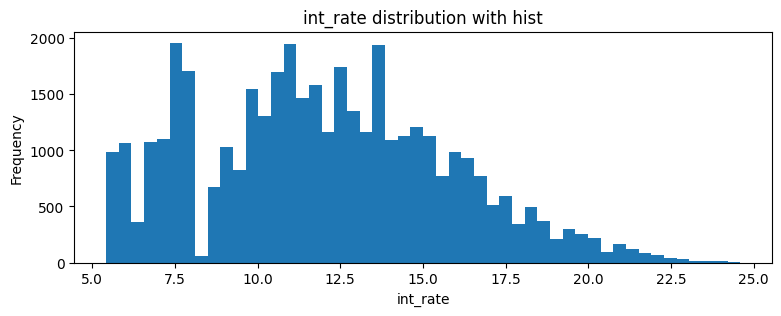

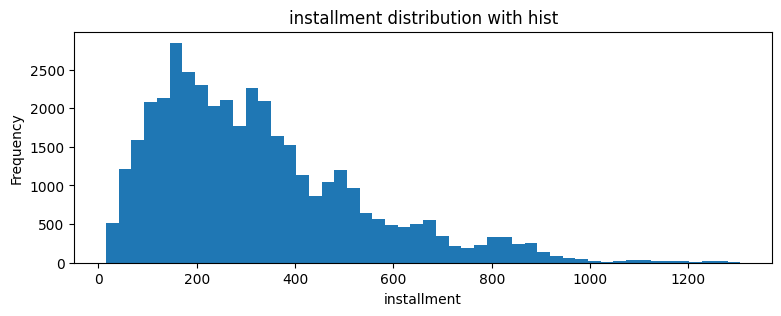

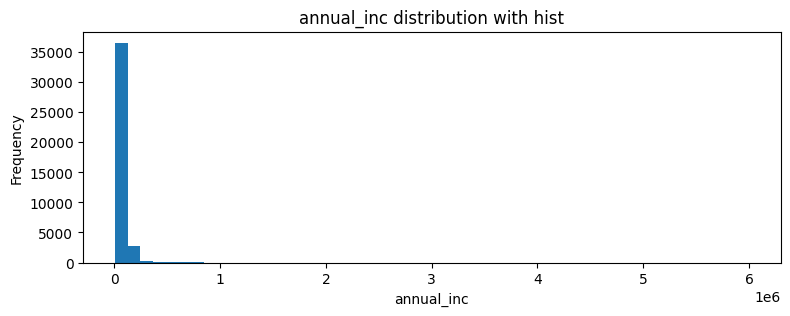

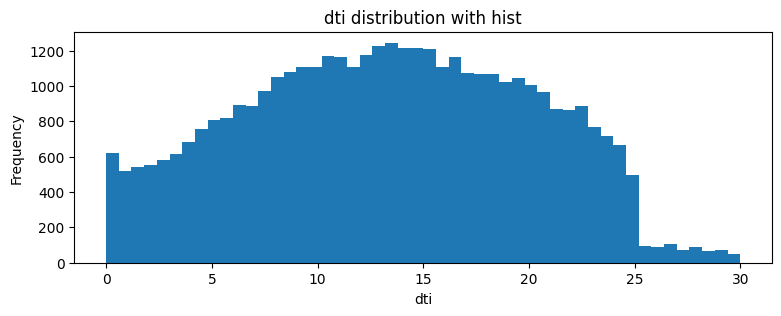

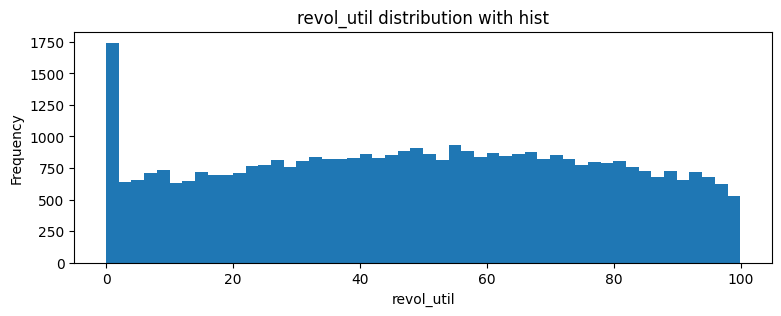

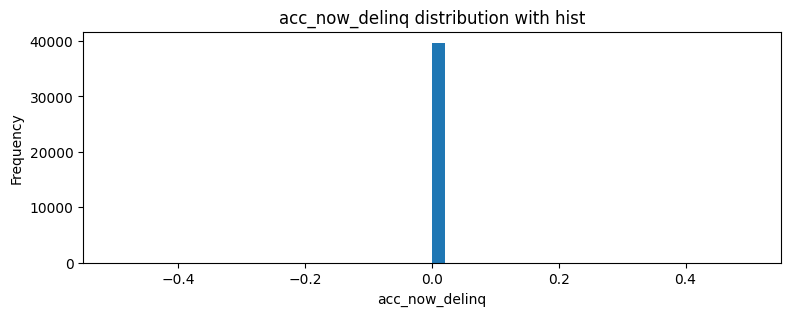

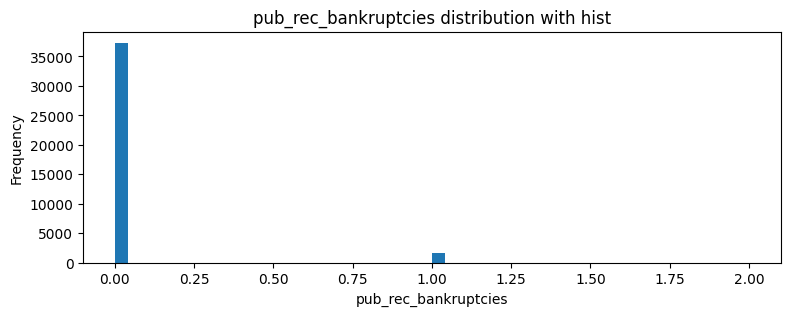

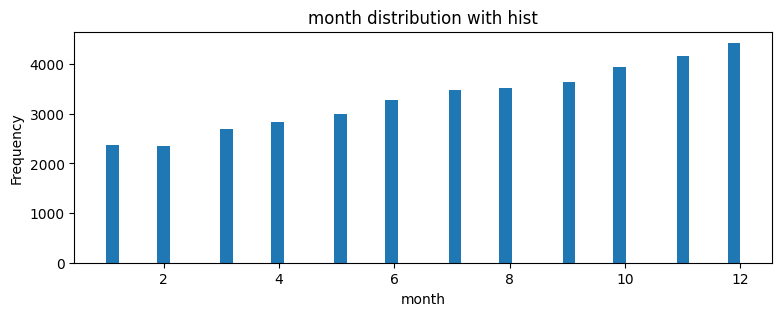

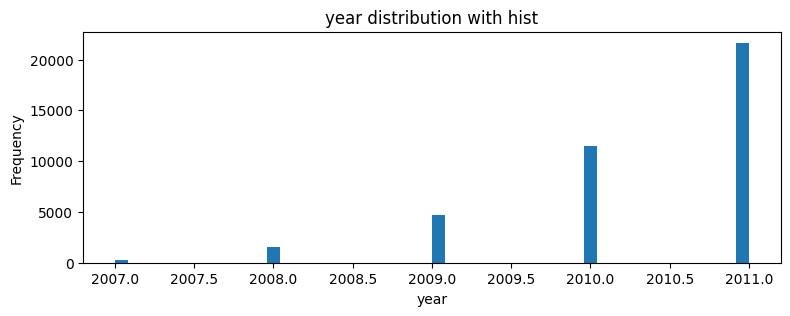

In [468]:
## 2. PLotting the histogram

for col in loan_num_columns:
    num_unique_value = loan_df[col].nunique()
    if num_unique_value != loan_num_columns.shape[0]:
        plot_hist(col)

## <font color=blue> Insights </font>
- Analysis of each numerical fields are carried out
- 

## Non-Numerical Column Analysis

In [469]:
## 1. Getting the non-numerical columns

loam_non_num_col = loan_df.select_dtypes(exclude="number")
print(loam_non_num_col.columns)

Index(['grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state'], dtype='object')


---------------grade -------------------


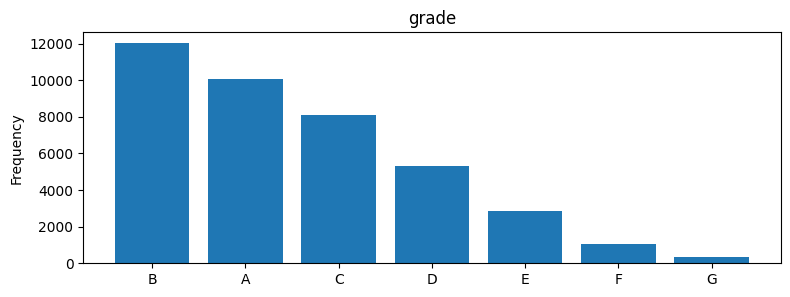

grade: 
 B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64
---------------home_ownership -------------------


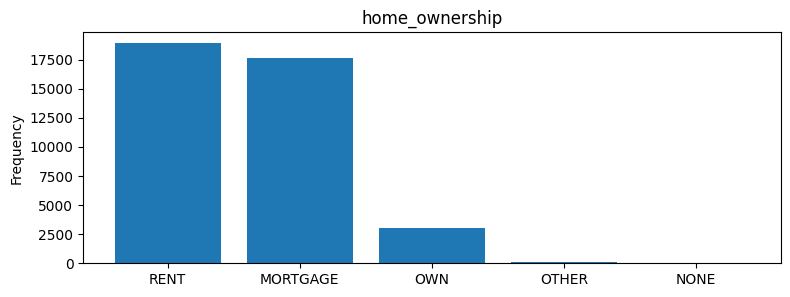

home_ownership: 
 RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64
---------------verification_status -------------------


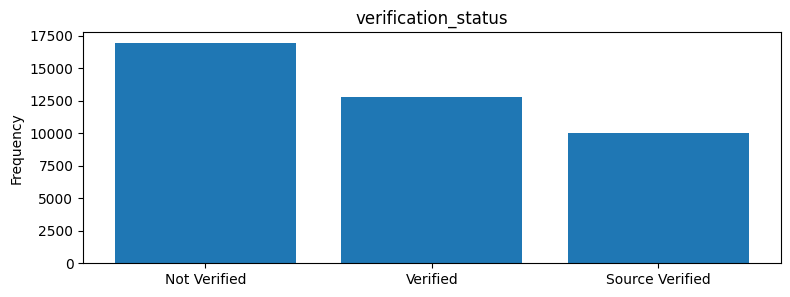

verification_status: 
 Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64
---------------loan_status -------------------


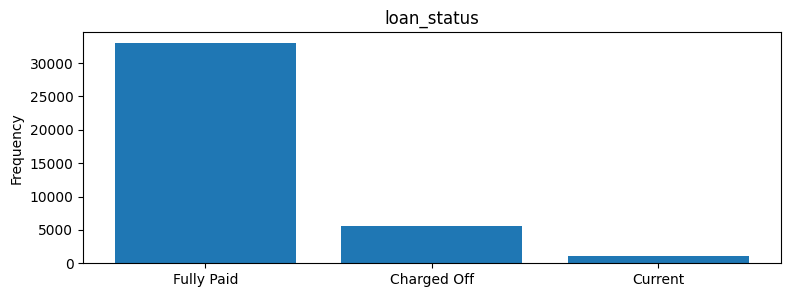

loan_status: 
 Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64
---------------pymnt_plan -------------------


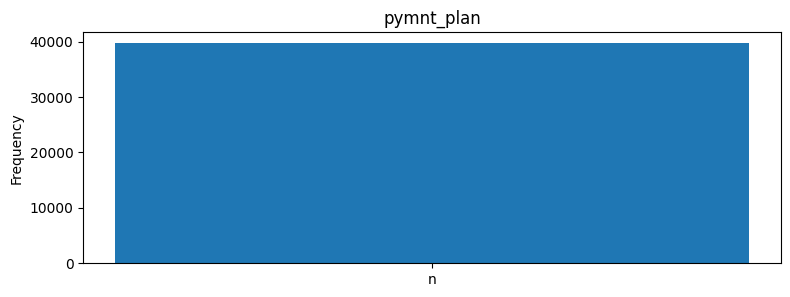

pymnt_plan: 
 n    39717
Name: pymnt_plan, dtype: int64


In [470]:
## 2. PLotting the barplot

for col in loam_non_num_col.columns:
    num_unique_value = loan_df[col].nunique()
    if num_unique_value <= 10:
        print(f"---------------{col} -------------------")
        bar_plot(col)

## <font color=blue> Insights </font>
- Analysis of each non-numerical fields are carried out
- 

### Ordered and unordered categorical variables

In [471]:
### Analyse the column loan_status, Lets find out what percentage of loan status for different category occupy 

print(loan_df['loan_status'].value_counts(normalize=True))


Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64


<Figure size 1000x600 with 0 Axes>

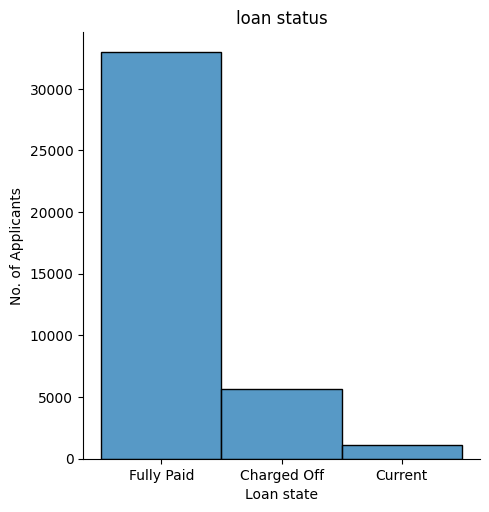

In [472]:
## Lets plot a distribution plot for it

plt.figure(figsize=(10,6))
sns.displot(loan_df['loan_status'])
plt.title('loan status')
plt.xlabel('Loan state')
plt.ylabel('No. of Applicants')
plt.show()


## Observation:
## Nearly more than 80% loans have been fully paid
## And around 14 % are charged Off

In [473]:
## Lets analyze the column loan_amnt. How much loan has been applied
## As it is a numeric field get gets some stats for this column

loan_df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

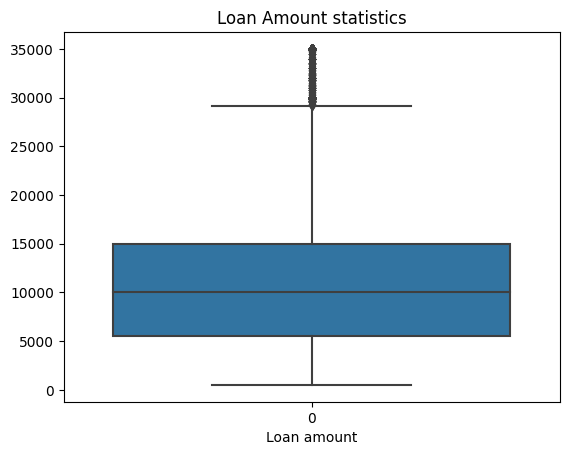

In [474]:
## Plotting a box plot for more understanding and visualize any outliers for it

sns.boxplot(loan_df['loan_amnt'])
plt.title('Loan Amount statistics')
plt.xlabel('Loan amount')
plt.show()

## Observations:
## Few of the records lie in the higher loan amount taken and are in the section of outliers

<Figure size 1000x1000 with 0 Axes>

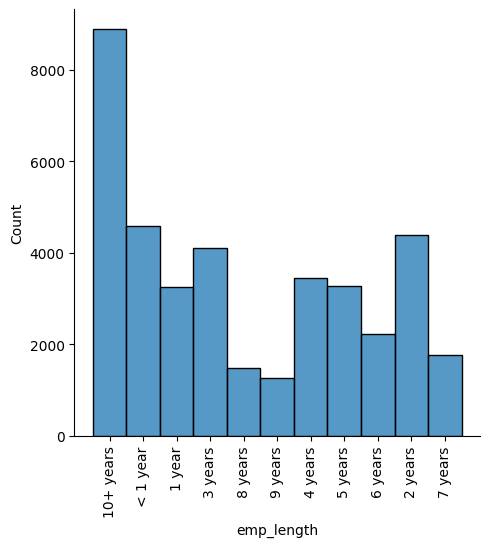

In [475]:
## Now lets get the statistics for the column emp_length
## Its a segmented data, lets view the distribution plot for it

plt.figure(figsize=(10,10))
sns.displot(loan_df['emp_length'])
plt.xticks(rotation=90)
plt.show()


## Observations:
## A high frequency of employees having more than 10+ years of experience avail the loan


In [476]:
## Analyze annual_inc

loan_df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot: >

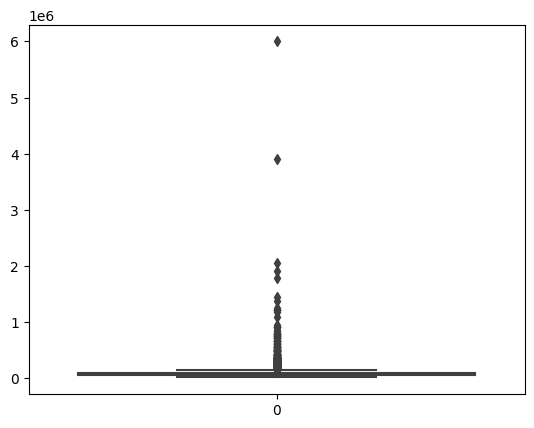

In [477]:
sns.boxplot(loan_df['annual_inc'])

(36815, 27)


<AxesSubplot: >

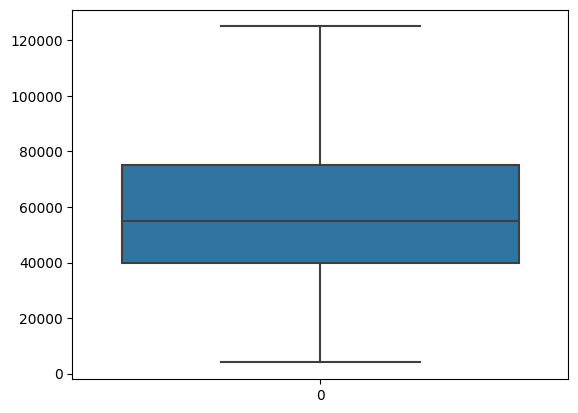

In [478]:
value  = np.percentile(loan_df['annual_inc'], 92.5)
loan_df_outlier = loan_df[loan_df['annual_inc'] <= value]

print(loan_df_outlier.shape)

sns.boxplot(loan_df_outlier['annual_inc'])

## Obserevations
## TODO

<AxesSubplot: >

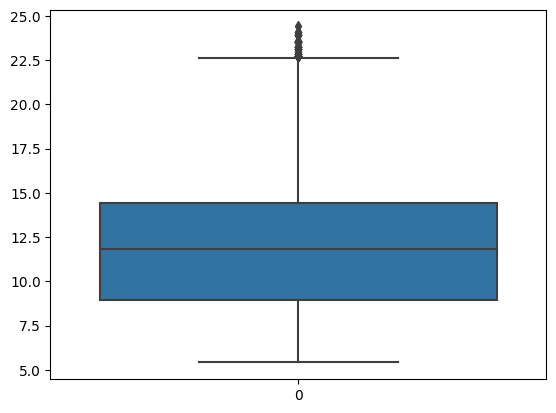

In [479]:
sns.boxplot(loan_df_outlier['int_rate'])

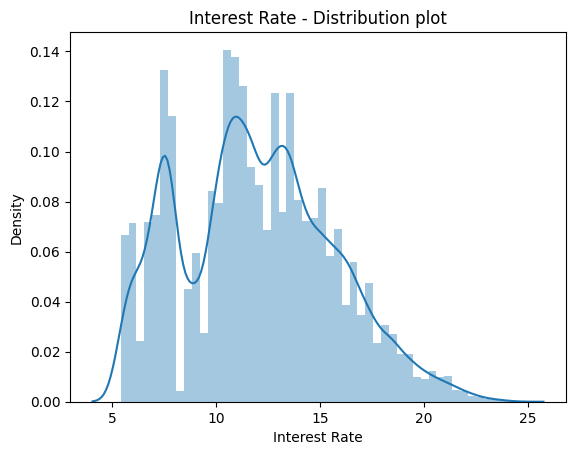

In [480]:
sns.distplot(loan_df_outlier['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Interest Rate - Distribution plot')
plt.show()

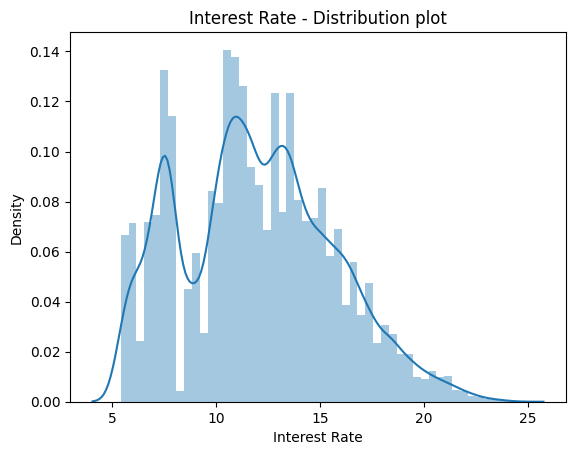

In [481]:
sns.distplot(loan_df_outlier['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Interest Rate - Distribution plot')
plt.show()

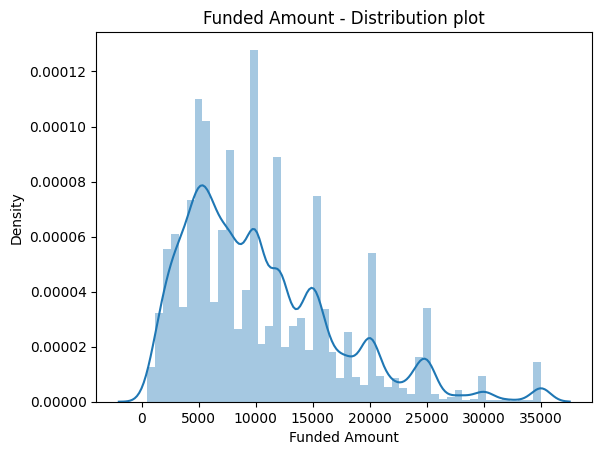

In [482]:
## funded_amnt

sns.distplot(loan_df_outlier['funded_amnt'])
plt.xlabel('Funded Amount')
plt.title('Funded Amount - Distribution plot')
plt.show()

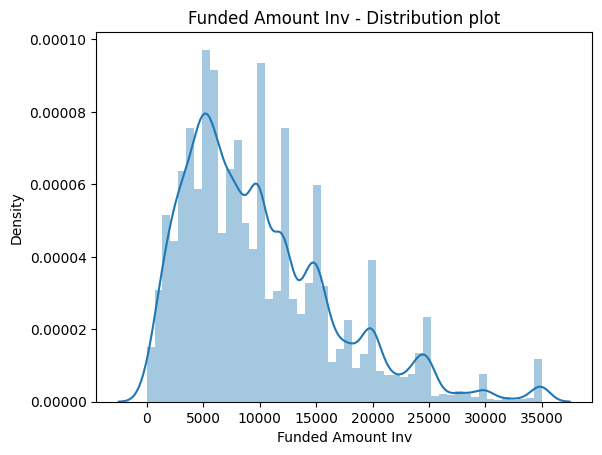

In [483]:
## funded_amnt_inv

sns.distplot(loan_df_outlier['funded_amnt_inv'])
plt.xlabel('Funded Amount Inv')
plt.title('Funded Amount Inv - Distribution plot')
plt.show()

<AxesSubplot: >

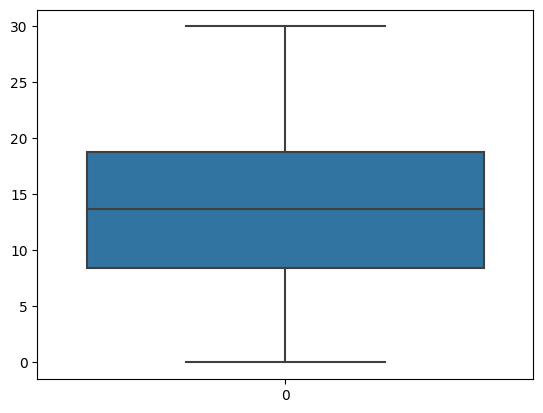

In [484]:
sns.boxplot(loan_df_outlier['dti'])

## BiVariate Analysis

In [485]:
loan_df_outlier.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,revol_util,acc_now_delinq,pub_rec_bankruptcies,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,Computer,AZ,27.65,83.7,0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,9.4,0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,real estate business,IL,8.72,98.5,0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,personel,CA,20.00,21.0,0,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,Personal,OR,17.94,53.9,0,0.0,12,2011


### loan_amount vs income

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'car'),
  Text(1, 0, 'small_business'),
  Text(2, 0, 'other'),
  Text(3, 0, 'debt_consolidation'),
  Text(4, 0, 'major_purchase'),
  Text(5, 0, 'credit_card'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'moving'),
  Text(8, 0, 'vacation'),
  Text(9, 0, 'house'),
  Text(10, 0, 'medical'),
  Text(11, 0, 'wedding'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

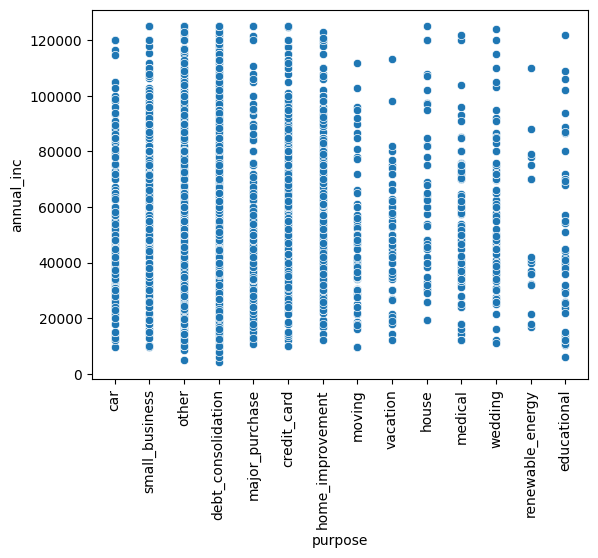

In [486]:


sns.scatterplot(data=loan_df_outlier[loan_df_outlier['loan_status'] == 'Charged Off'], x='purpose', y='annual_inc')
plt.xticks(rotation=90)
# sns.scatterplot(data=loan_df_outlier[loan_df_outlier['loan_status'] == 'Fully Paid'], x='loan_amnt', y='annual_inc')


<Figure size 1500x1000 with 0 Axes>

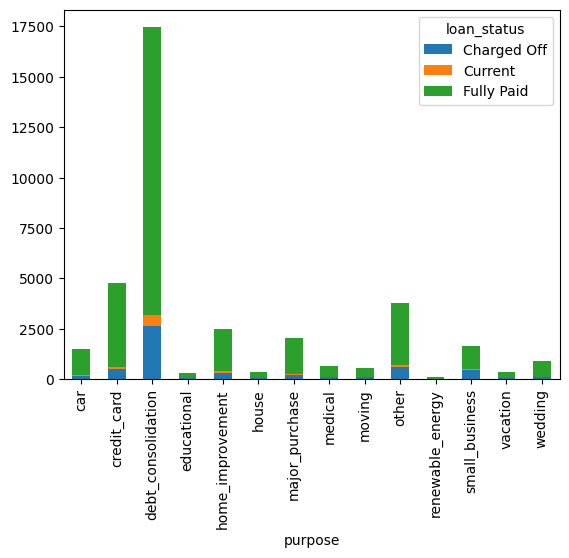

In [487]:
plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='purpose', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar(stacked=True)
plt.show()

# (pd.pivot_table(data=loan_df_outlier, index='purpose', columns = 'loan_status', aggfunc='count'))['annual_inc'].plot.bar(stacked=True)

<AxesSubplot: xlabel='loan_status', ylabel='purpose'>

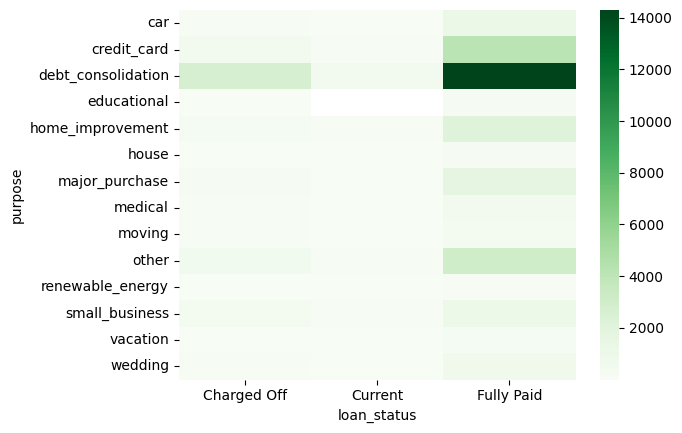

In [488]:
sns.heatmap(data = data1, cmap='Greens')

### term_in_months vs loan_status

<Figure size 1500x1000 with 0 Axes>

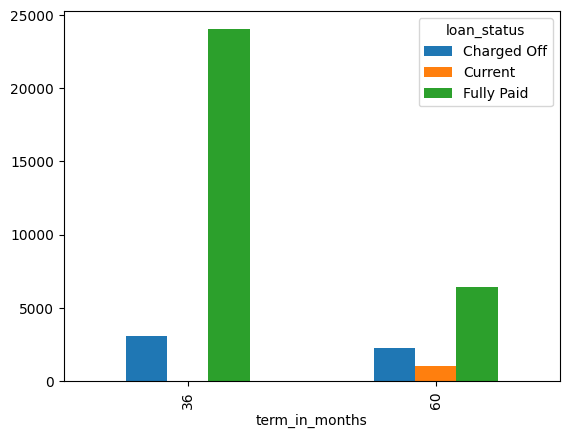

In [489]:


plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='term_in_months', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.show()

### emp_length vs loan_status

<Figure size 1500x1000 with 0 Axes>

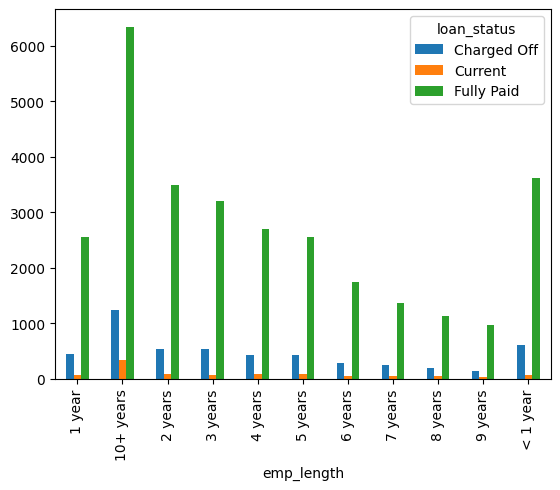

In [490]:


plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='emp_length', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.show()

### 4. Interest rate vs Loan status

<Figure size 1500x1000 with 0 Axes>

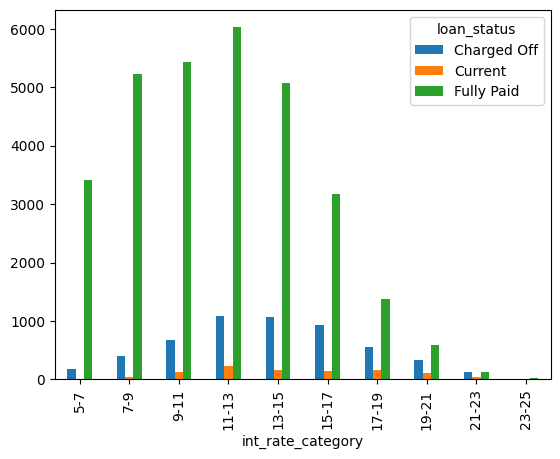

In [491]:
### Create bins for interest rate : convert continuous data to categorical
loan_df_outlier['int_rate_category'] = pd.cut(x=loan_df_outlier['int_rate'], bins=[5,7,9,11,13,15,17,19,21,23,25],
                     labels=['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25'])

plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_outlier, index='int_rate_category', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.show()

<AxesSubplot: xlabel='int_rate', ylabel='Density'>

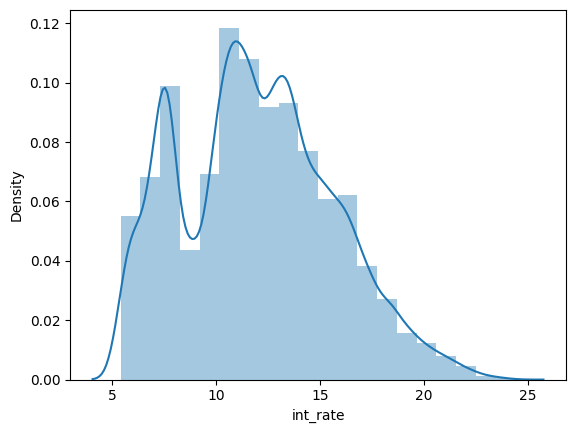

In [492]:
sns.distplot(loan_df_outlier['int_rate'], bins=20)

## Charged off Data Set

In [493]:
## lets analyze only charged off data with various field values


loan_df_charged_off = loan_df_outlier[loan_df_outlier['loan_status'] == 'Charged Off']
loan_df_charged_off.shape

(5328, 28)

In [494]:
loan_df_charged_off.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,revol_util,acc_now_delinq,pub_rec_bankruptcies,month,year,int_rate_category
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,bike,GA,1.00,9.4,0,0.0,12,2011,15-17
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,2011-12-01,Charged Off,n,small_business,Expand Business & Buy Debt Portfolio,CA,5.55,32.6,0,0.0,12,2011,21-23


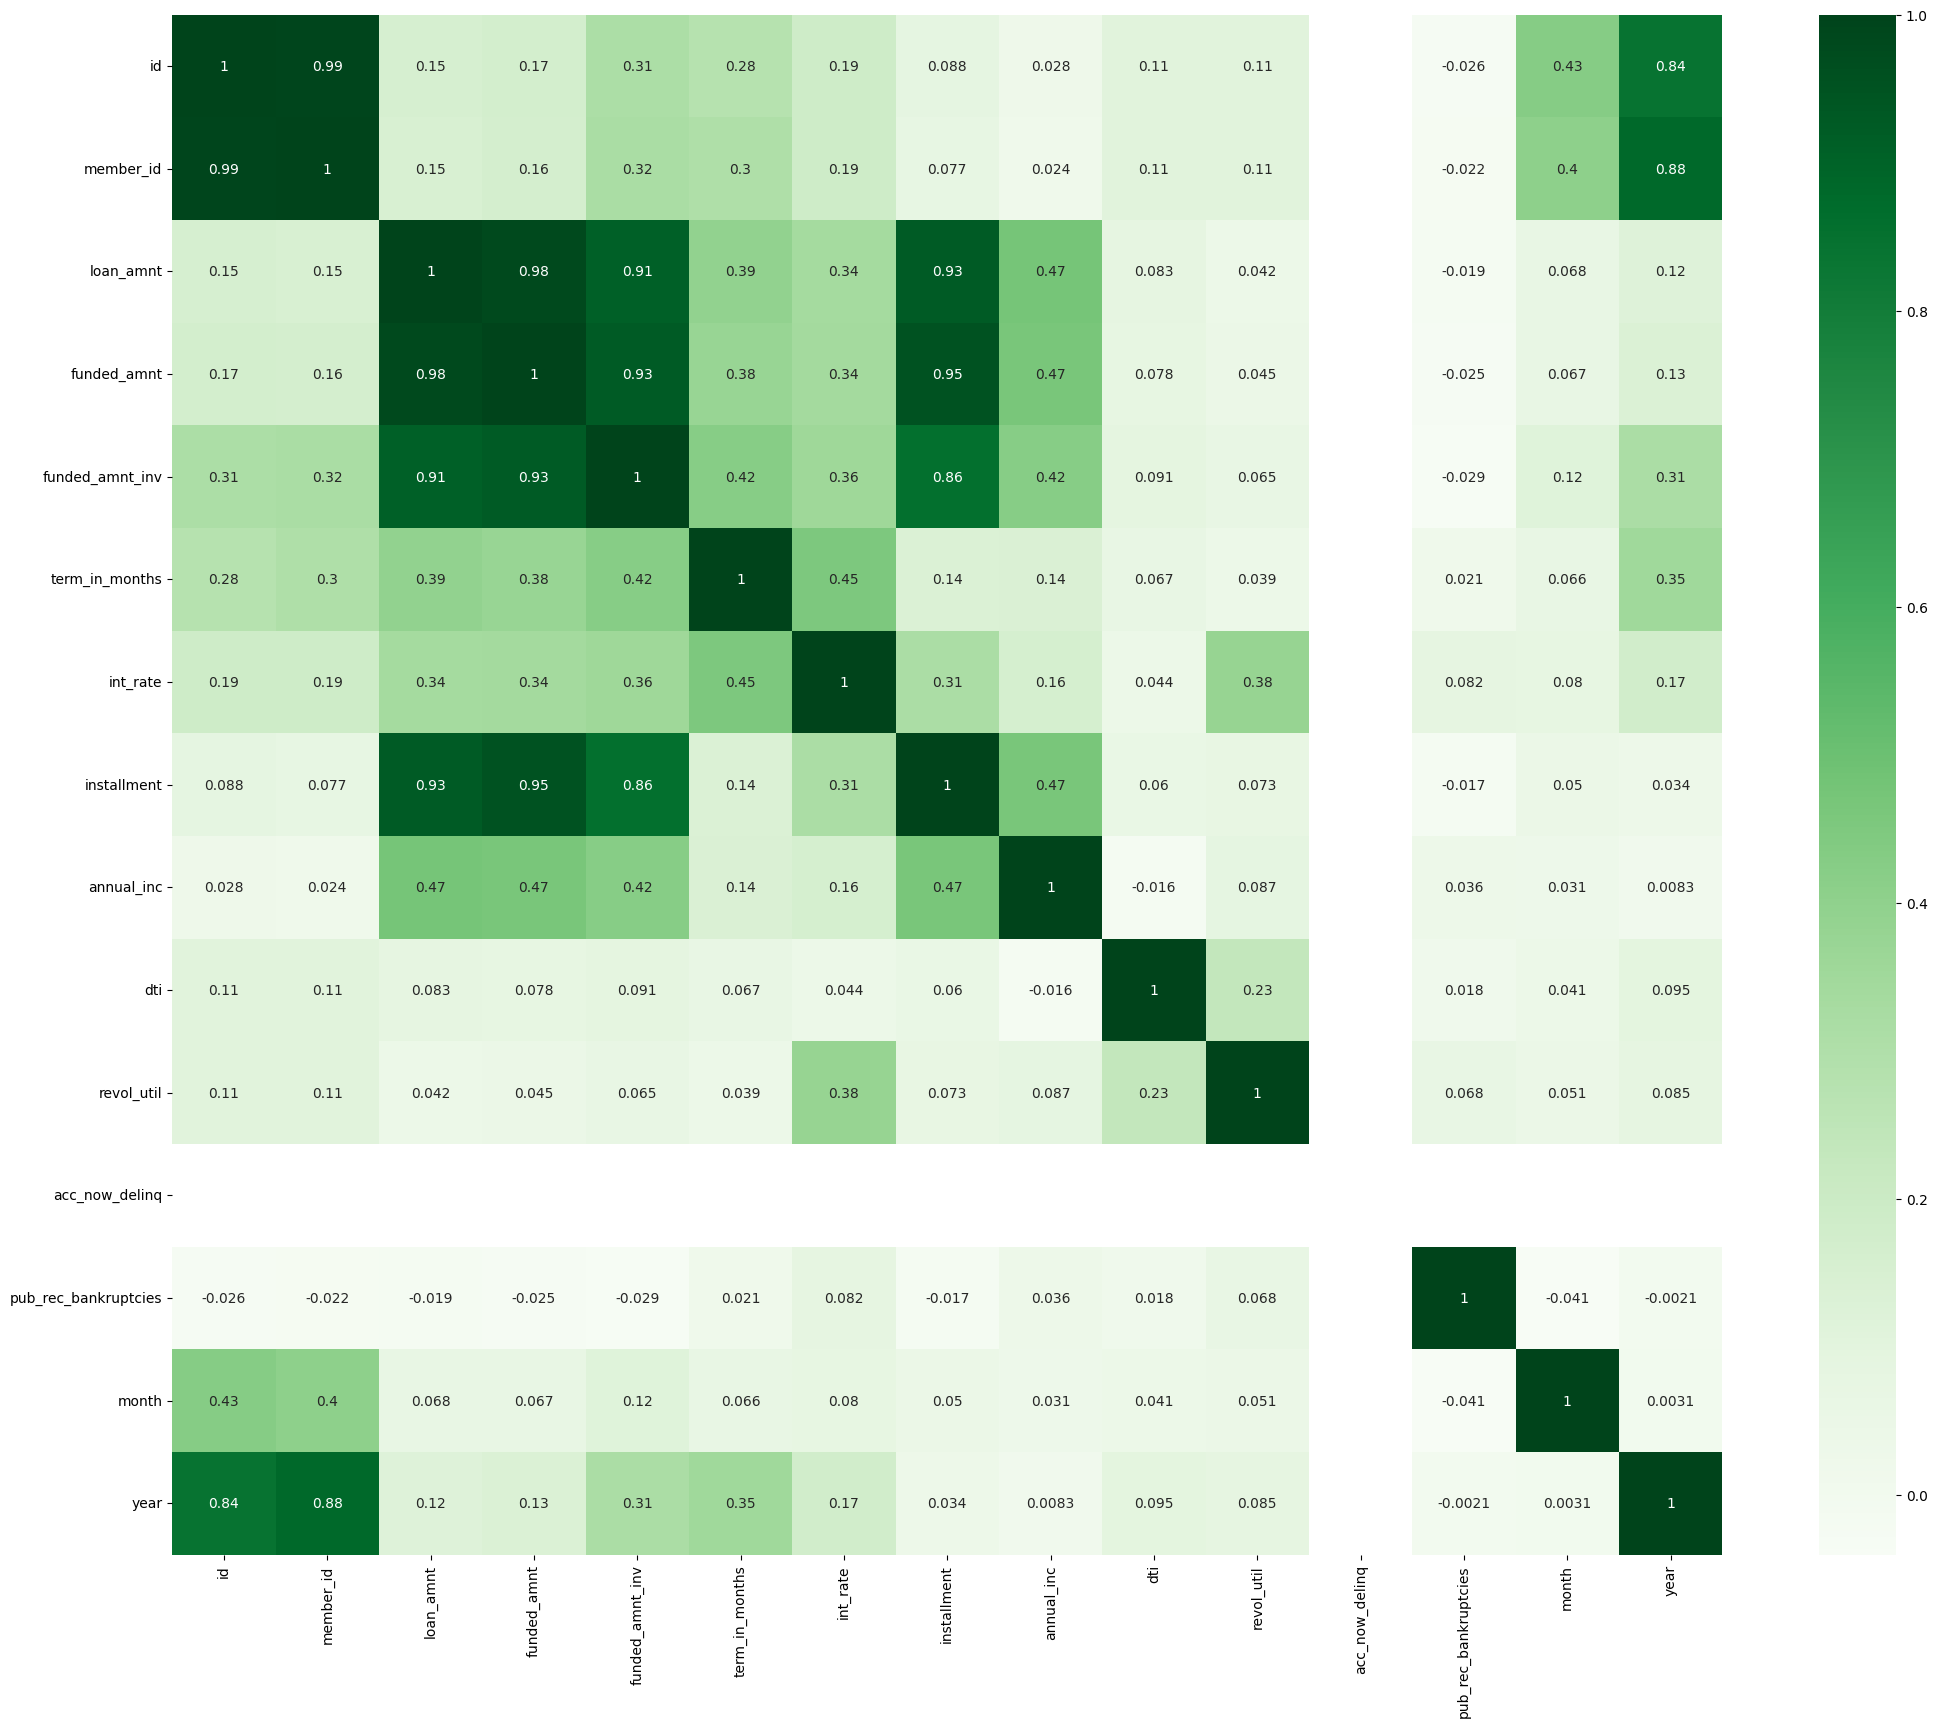

In [495]:
## lets view the corr

plt.figure(figsize=(25,20))
corr_data = loan_df_charged_off.corr()
sns.heatmap(data=corr_data, cmap="Greens", annot=True)
plt.show()

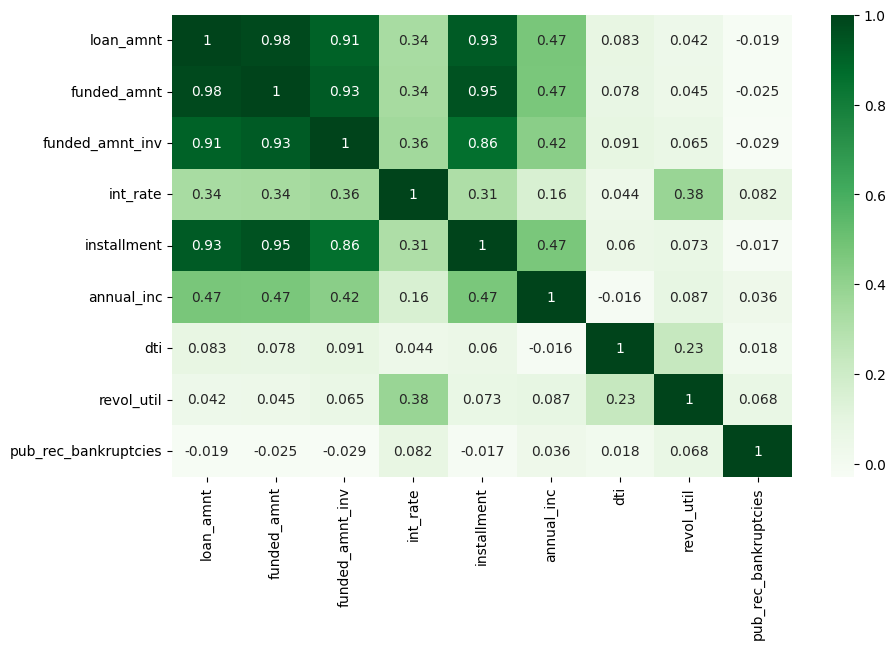

In [496]:
corr_list_of_fields = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti', 'revol_util','pub_rec_bankruptcies']
dataset = loan_df_charged_off.loc[:,corr_list_of_fields]

plt.figure(figsize=(10,6))
corr_data = dataset.corr()
sns.heatmap(data=corr_data, cmap="Greens", annot=True)
plt.show()

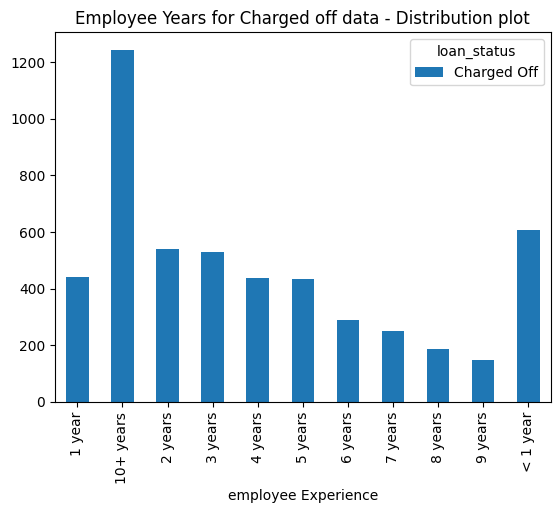

In [497]:
# emp_length dist plot

data1 = pd.pivot_table(data=loan_df_charged_off, index='emp_length', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar(stacked=True)

plt.xlabel('employee Experience')
plt.title('Employee Years for Charged off data - Distribution plot')
plt.show()

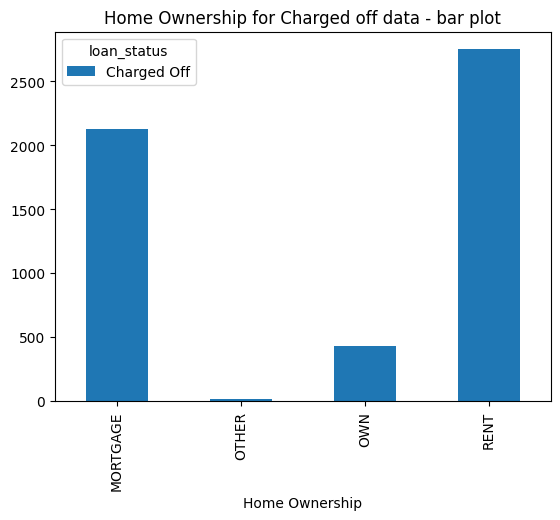

In [498]:
# home_ownership

data1 = pd.pivot_table(data=loan_df_charged_off, index='home_ownership', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()

plt.xlabel('Home Ownership')
plt.title('Home Ownership for Charged off data - bar plot')
plt.show()

<AxesSubplot: xlabel='year', ylabel='Density'>

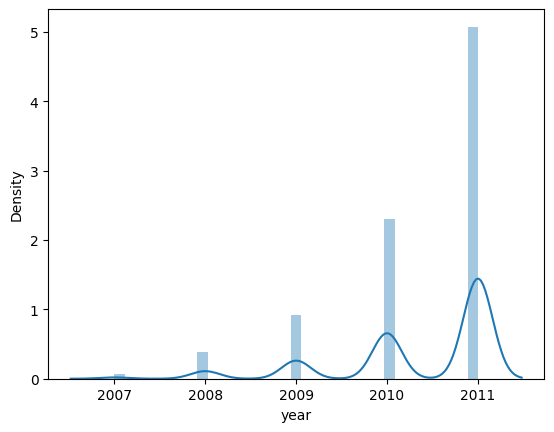

In [499]:
##

sns.distplot(loan_df_charged_off['year'])


<Figure size 1500x1000 with 0 Axes>

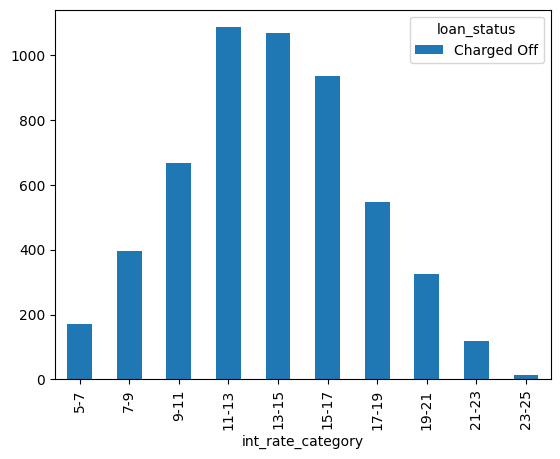

In [500]:
loan_df_charged_off['int_rate_category'] = pd.cut(x=loan_df_charged_off['int_rate'], bins=[5,7,9,11,13,15,17,19,21,23,25],
                     labels=['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25'])

plt.figure(figsize=(15,10))

data1 = pd.pivot_table(data=loan_df_charged_off, index='int_rate_category', columns = 'loan_status', aggfunc='count')['annual_inc']
data1.plot.bar()
plt.show()

<AxesSubplot: xlabel='revol_util', ylabel='Density'>

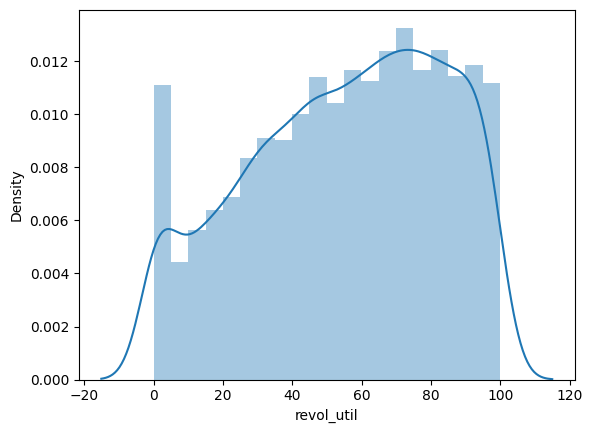

In [501]:
loan_df_charged_off['revol_util'].sort_values()

# loan_df_charged_off['revol_util_category'] = pd.cut(x=loan_df_charged_off['revol_util'], bins=[5,7,9,11,13,15,17,19,21,23,25],
#                      labels=['5-7','7-9','9-11','11-13','13-15','15-17','17-19','19-21','21-23','23-25'])

# plt.figure(figsize=(15,10))

# data1 = pd.pivot_table(data=loan_df_charged_off, index='int_rate_category', columns = 'loan_status', aggfunc='count')['annual_inc']
# data1.plot.bar()
# plt.show()

sns.distplot(loan_df_charged_off['revol_util'])

<AxesSubplot: xlabel='verification_status', ylabel='count'>

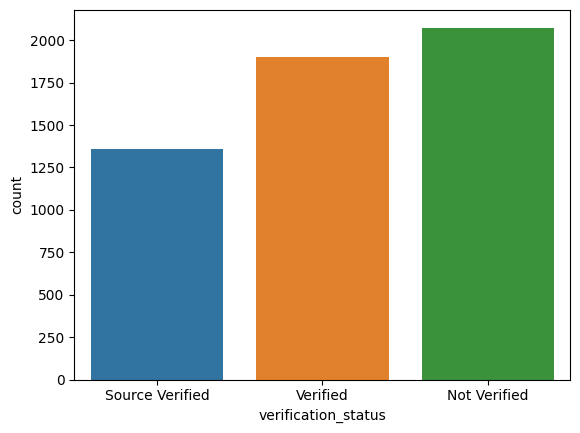

In [502]:
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['verification_status'])

<AxesSubplot: xlabel='annual_inc', ylabel='Density'>

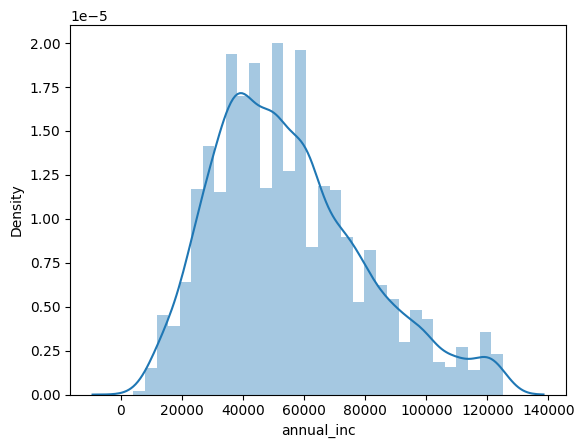

In [503]:
sns.distplot(loan_df_charged_off['annual_inc'])

<AxesSubplot: xlabel='grade', ylabel='count'>

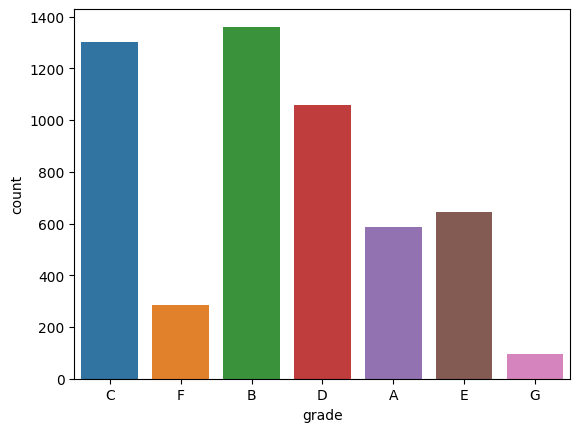

In [504]:
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['grade'])

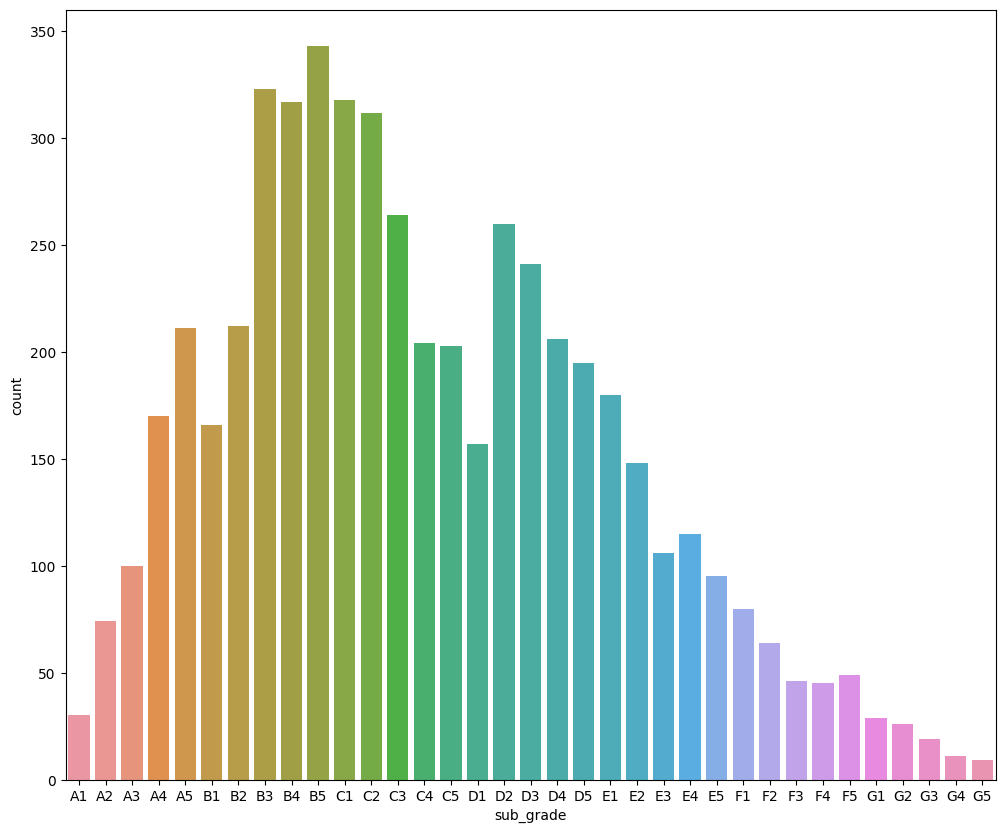

In [505]:
plt.figure(figsize=(12,10))
sns.countplot(data=loan_df_charged_off,x=loan_df_charged_off['sub_grade'].sort_values())
plt.show()

In [506]:
loan_df_outlier['charged_flag'] = loan_df_outlier['loan_status'].apply(lambda x : 1 if x=='Charged Off' else 0)
loan_df_outlier['charged_flag'].value_counts()

0    31487
1     5328
Name: charged_flag, dtype: int64

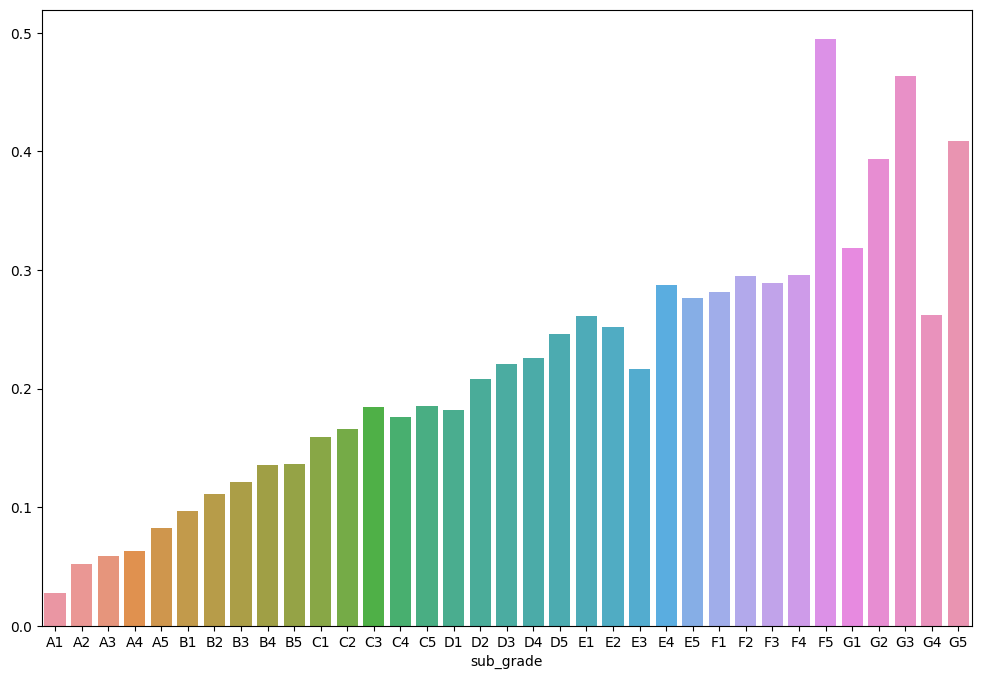

In [507]:
sub_grade_data = pd.pivot_table(data=loan_df_outlier,index=loan_df_outlier['sub_grade'], values='charged_flag', aggfunc=('count','sum'))
sub_grade_data.index

plt.figure(figsize=(12,8))
sns.barplot(data=sub_grade_data, x=sub_grade_data.index, y=sub_grade_data['sum']/sub_grade_data['count'])
plt.show()

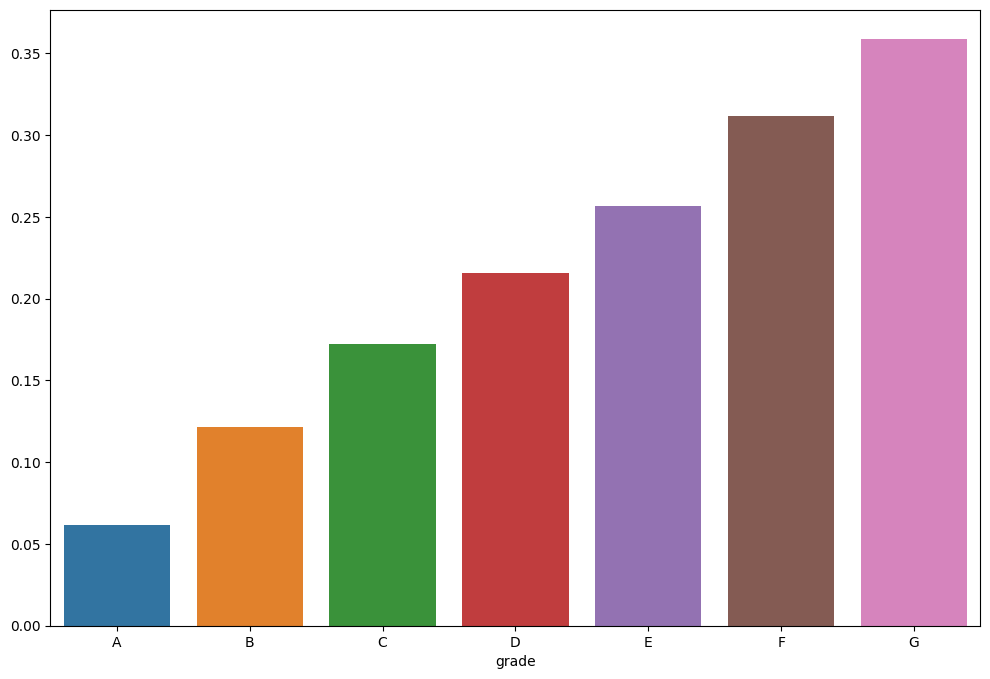

In [508]:
grade_data = pd.pivot_table(data=loan_df_outlier,index=loan_df_outlier['grade'], values='charged_flag', aggfunc=('count','sum'))
grade_data.index

plt.figure(figsize=(12,8))
sns.barplot(data=grade_data, x=grade_data.index, y=grade_data['sum']/grade_data['count'])
plt.show()